# Exercise 5. Compression

### Import Liberaries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### A Function for Applying List of Functions to the Blocks

In [2]:
def block_proc(image, size, functions):
    ret = np.copy(image)
    for i in range(0, ret.shape[0], size[0]):
        for j in range(0, ret.shape[1], size[1]):
            for fun in functions:
                ret[i:i + size[0], j:j + size[1]] = fun(ret[i:i + size[0], j:j + size[1]])
    return ret

### Creating Mask and Quantization Table

In [3]:
mask = np.ones((8, 8))
mask[2:, 2:] = np.zeros((6, 6))

quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                               [12, 12, 14, 19, 26, 58, 60, 55],
                               [14, 13, 16, 24, 40, 57, 69, 56],
                               [14, 17, 22, 29, 51, 87, 80, 62],
                               [18, 22, 37, 56, 68, 109, 103, 77],
                               [24, 35, 55, 64, 81, 104, 113, 92],
                               [49, 64, 78, 87, 103, 121, 120, 101],
                               [72, 92, 95, 98, 112, 100, 103, 99]])

### Function for Applying JPEG Steps and Showing the Result
#### In python '//' operator perform quantized division (the result is an integer)
#### The last Two steps are for recovering the image (x * (alpha * quantization_table), cv2.idct)

In [4]:
def JPEG(src, alpha):
    src = block_proc(src, (8, 8), [cv2.dct, lambda x: x * mask, lambda x: x // (alpha * quantization_table),
                                   lambda x: x * (alpha * quantization_table), cv2.idct])
    plt.figure(figsize=(8, 6))
    plt.imshow(src, cmap='gray')
    plt.title(f"JPEG with alpha: {alpha}")
    plt.show()

### Reading and Showing Original Image

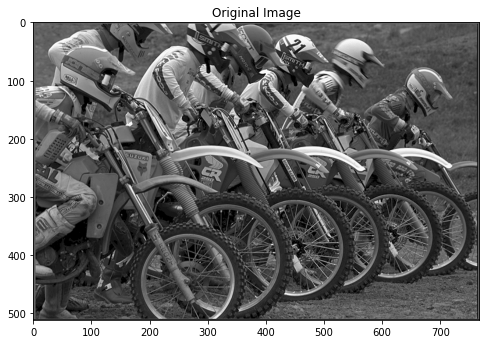

In [5]:
img = cv2.imread("kodim05.png", cv2.IMREAD_GRAYSCALE).astype("float64")
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()

### Calculating JPEG with Different ALPHAs

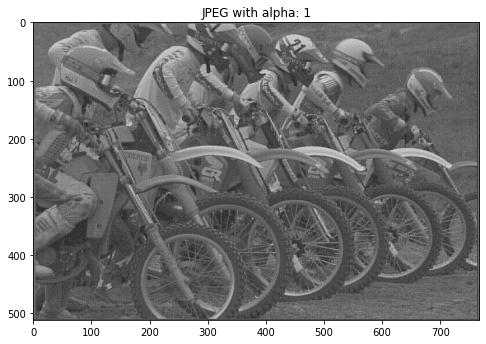

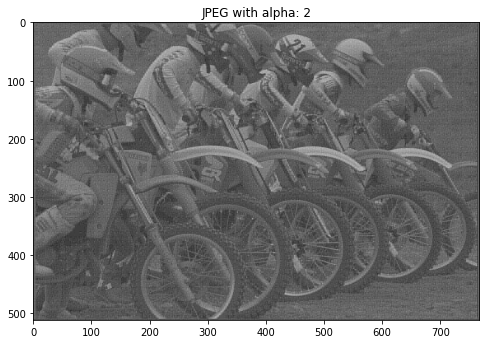

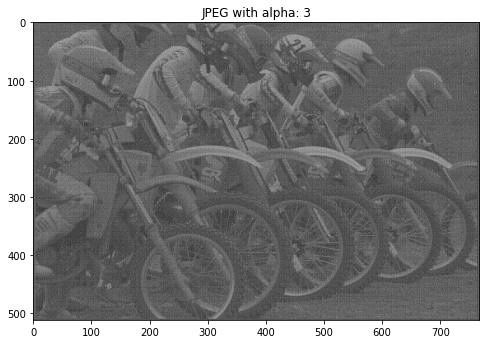

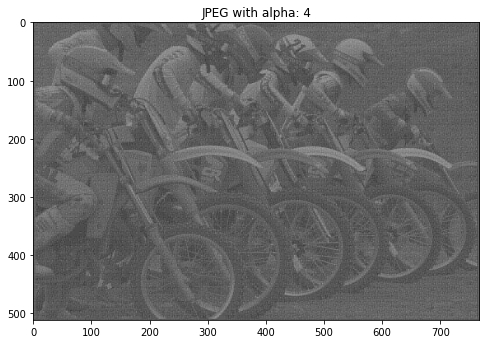

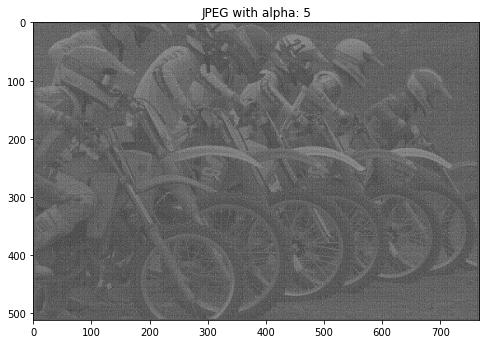

In [6]:
for i in range(5):
    JPEG(img, i + 1)

#### The higher alpha generate lower image quality

#### In original JPEG there is no masking step